<a href="https://colab.research.google.com/github/mindscope-world/AI-Medical-Imaging/blob/main/Forecasting_Retail_Consumer_Purchase_Trends_in_Kenya_Using_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Retail Consumer Purchase Trends in Kenya Using Machine Learning Algorithms

## Table of Contents
1. Data Overview:
    * Load the dataset.
    * Explore the structure, types, and summary statistics.

2. Feature Engineering:
    * Handle missing values.
    * Encode categorical variables.
    * Normalize/scale numerical variables.
    * Exploratory Data Analysis (EDA):
    * Visualize relationships between variables.
    * Analyze distributions and correlations.

3. Statistical Analysis:
    * Perform hypothesis testing and statistical significance checks.
    * Investigate variable relationships.

4. Feature Importance:
    * Use techniques like correlation analysis, mutual information, or tree-based models to rank feature importance.
5. Model Development:
    * Split data into training and testing sets.
    * Train and evaluate models (e.g., linear regression, random forest).

6. Model Interpretation:
    * Explain the contributions of each independent variable.


## Getting Started

### Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load Data
[https://raw.githubusercontent.com/NcikoLinda/data/refs/heads/main/Final_data.csv](https://raw.githubusercontent.com/NcikoLinda/data/refs/heads/main/Final_data.csv)

In [35]:
# Load the dataset
file_path = 'https://raw.githubusercontent.com/NcikoLinda/data/refs/heads/main/Final_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
data.head()

,Serial-No,Period,Location,Gender,Marital-status,Age-group,Occupation,Income-Level,"Personal-Hygiene (eg Soap, toothpaste)",Cleaning-products,"Fresh-groceries (Fruits, vegetables)",Medicines-Natural-remedies,Alcohol-beverages,Skin-care (eg. Body lotion),Hair-care (eg. Shampoo),"Entertainment (eg. Restaurants, movies)","Beauty (eg Makeup, cosmetics, haircuts)",Clothing,Airtime-Data-bundles
0,1,20/03/2024,N36,Male,Married,Millennials,Business owner,Middle Income,More,More,More,Same,More,More,More,More,More,More,Same
1,2,20/03/2024,N4,Female,Married,Millennials,Salaried employee,Middle Income,Same,Same,Same,Same,Same,Same,Same,Same,Same,Same,Same
2,3,20/03/2024,N12,Male,Married,Millennials,Self employed/Contractor,Low Income,Same,Same,Same,Less,Don't Know or Don't Buy,Don't Know or Don't Buy,Don't Know or Don't Buy,Less,Same,Less,Same
3,4,20/03/2024,N20,Female,Married,Gen X,Self employed/Contractor,High Income,More,More,Same,Same,Don't Know or Don't Buy,Same,Same,Same,Same,Same,Same
4,5,20/03/2024,N28,Female,Married,Gen X,Unemployed,High Income,Same,Same,Same,Same,Same,Same,Same,Same,Same,Same,Same


In [36]:
# Get size of dataset
data.shape

(9560, 19)

In [37]:
# Basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9560 entries, 0 to 9559
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Serial-No                                9560 non-null   int64 
 1   Period                                   9560 non-null   object
 2   Location                                 9560 non-null   object
 3   Gender                                   9560 non-null   object
 4   Marital-status                           9560 non-null   object
 5   Age-group                                9560 non-null   object
 6   Occupation                               9560 non-null   object
 7   Income-Level                             7162 non-null   object
 8    Personal-Hygiene (eg Soap, toothpaste)  9560 non-null   object
 9   Cleaning-products                        9560 non-null   object
 10  Fresh-groceries (Fruits, vegetables)     9560 non-null   obj

## Feature Engineering

In [38]:
# Summary statistics
data.describe(include='all')

,Serial-No,Period,Location,Gender,Marital-status,Age-group,Occupation,Income-Level,"Personal-Hygiene (eg Soap, toothpaste)",Cleaning-products,"Fresh-groceries (Fruits, vegetables)",Medicines-Natural-remedies,Alcohol-beverages,Skin-care (eg. Body lotion),Hair-care (eg. Shampoo),"Entertainment (eg. Restaurants, movies)","Beauty (eg Makeup, cosmetics, haircuts)",Clothing,Airtime-Data-bundles
count,9560.000000,9560,9560,9560,9560,9560,9560,7162,9560,9560,9560,9560,9560,9560,9560,9560,9560,9560,9560
unique,NaN,19,79,2,8,4,10,3,4,4,4,4,4,4,4,4,4,4,4
top,NaN,20/09/2020,N1,Male,Married,Millennials,Salaried employee,Middle Income,Same,Same,Same,Same,Same,Same,Same,Same,Same,Same,Same
freq,NaN,552,307,4986,4274,5607,4804,3654,5389,5193,5225,4173,3094,5088,4383,3569,4303,4507,4890
mean,4780.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2759.878621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2390.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4780.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7170.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Checking for missing values
missing_values = data.isnull().sum()

# Display missing values
missing_values

,0
Serial-No,0
Period,0
Location,0
Gender,0
Marital-status,0
Age-group,0
Occupation,0
Income-Level,2398
"Personal-Hygiene (eg Soap, toothpaste)",0
Cleaning-products,0


### 1. Missing Values:

Significant missing data is present in the "Income-Level" column (around 25%). We'll handle this during data preprocessing.
Distributions:

In [40]:
data.dropna(inplace=True, axis=0)
data.isna().sum()

,0
Serial-No,0
Period,0
Location,0
Gender,0
Marital-status,0
Age-group,0
Occupation,0
Income-Level,0
"Personal-Hygiene (eg Soap, toothpaste)",0
Cleaning-products,0


In [41]:
# Print the column names
data.columns

Index(['Serial-No', 'Period', 'Location', 'Gender', 'Marital-status',
       'Age-group', 'Occupation', 'Income-Level',
       ' Personal-Hygiene (eg Soap, toothpaste)', 'Cleaning-products ',
       'Fresh-groceries (Fruits, vegetables)', 'Medicines-Natural-remedies',
       'Alcohol-beverages', 'Skin-care (eg. Body lotion)',
       'Hair-care (eg. Shampoo)', 'Entertainment (eg. Restaurants, movies)',
       'Beauty (eg Makeup, cosmetics, haircuts)', 'Clothing',
       'Airtime-Data-bundles'],
      dtype='object')

In [42]:
# Get the unique values for each column
for column in data.columns:
    print(f"Unique values in column '{column}':")
    print(data[column].unique())
    print()  # Adds a blank line between columns


Unique values in column 'Serial-No':
[   1    2    3 ... 7160 7161 7162]

Unique values in column 'Period':
['20/03/2024' '20/11/2023' '20/07/2023' '20/03/2023' '20/11/2022'
 '20/06/2022' '20/02/2022' '20/10/2021' '20/07/2021' '20/04/2021'
 '20/12/2020' '20/11/2020' '20/10/2020' '20/09/2020']

Unique values in column 'Location':
['N36' 'N4' 'N12' 'N20' 'N28' 'N11' 'N25' 'N2' 'NK1' 'N14' 'N8' 'N17'
 'N16' 'N21' 'N27' 'N47' 'N41' 'N42' 'N5' 'N48' 'N9' 'N35' 'N50' 'N18'
 'N31' 'N13' 'N6' 'N22' 'N30' 'N10' 'N1' 'MS1' 'N43' 'N34' 'N23' 'N37'
 'D7' 'AC30' 'N40' 'N45' 'N46' 'D39' 'Z9' 'M1' 'N24' 'N19' 'AC28' 'N15'
 'L47' 'N29' 'T18' 'D3' 'N26' 'N7' 'N38' 'AB2' 'L32' 'N3' 'N33' 'T11'
 'D44' 'D16' 'D22' 'D21' 'D23' 'D43' 'D41' 'D15' 'D40' 'T23' 'D42' 'AB7'
 'AB5' 'N39']

Unique values in column 'Gender':
['Male' 'Female']

Unique values in column 'Marital-status':
['Married' 'Cohabiting' 'Dating' 'Divorced/Separated/Widowed' 'Single'
 'Married ' 'Single ' 'Dating ']

Unique values in column 'Ag

In [43]:
# Replace "Don't Know or Don't Buy" with "Not sure"
columns_to_replace = [' Personal-Hygiene (eg Soap, toothpaste)', 'Cleaning-products ',
                      'Fresh-groceries (Fruits, vegetables)', 'Medicines-Natural-remedies',
                      'Alcohol-beverages', 'Skin-care (eg. Body lotion)', 'Hair-care (eg. Shampoo)',
                      'Entertainment (eg. Restaurants, movies)',
                      'Beauty (eg Makeup, cosmetics, haircuts)', 'Clothing', 'Airtime-Data-bundles']

data[columns_to_replace] = data[columns_to_replace].replace("Don't Know or Don't Buy", "Not sure")

# Handle missing values by replacing with mode
for column in data.columns:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)


In [44]:
data.isna().sum()

,0
Serial-No,0
Period,0
Location,0
Gender,0
Marital-status,0
Age-group,0
Occupation,0
Income-Level,0
"Personal-Hygiene (eg Soap, toothpaste)",0
Cleaning-products,0


In [45]:
# Check for duplicate values
data.duplicated().sum()

0

In [46]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

### Exploratory Data Analysis (EDA)

In [47]:
# Get size of dataset
data.shape

(7162, 19)

In [48]:
data.drop(['Serial-No'], axis=1,inplace=True)
data.head(2)

,Period,Location,Gender,Marital-status,Age-group,Occupation,Income-Level,"Personal-Hygiene (eg Soap, toothpaste)",Cleaning-products,"Fresh-groceries (Fruits, vegetables)",Medicines-Natural-remedies,Alcohol-beverages,Skin-care (eg. Body lotion),Hair-care (eg. Shampoo),"Entertainment (eg. Restaurants, movies)","Beauty (eg Makeup, cosmetics, haircuts)",Clothing,Airtime-Data-bundles
0,20/03/2024,N36,Male,Married,Millennials,Business owner,Middle Income,More,More,More,Same,More,More,More,More,More,More,Same
1,20/03/2024,N4,Female,Married,Millennials,Salaried employee,Middle Income,Same,Same,Same,Same,Same,Same,Same,Same,Same,Same,Same


### 2. Distributions:

* The gender distribution appears balanced.
* Income-level distribution is skewed; we'll verify further after handling missing values.
* Occupation has diverse categories, which will be encoded for modeling.

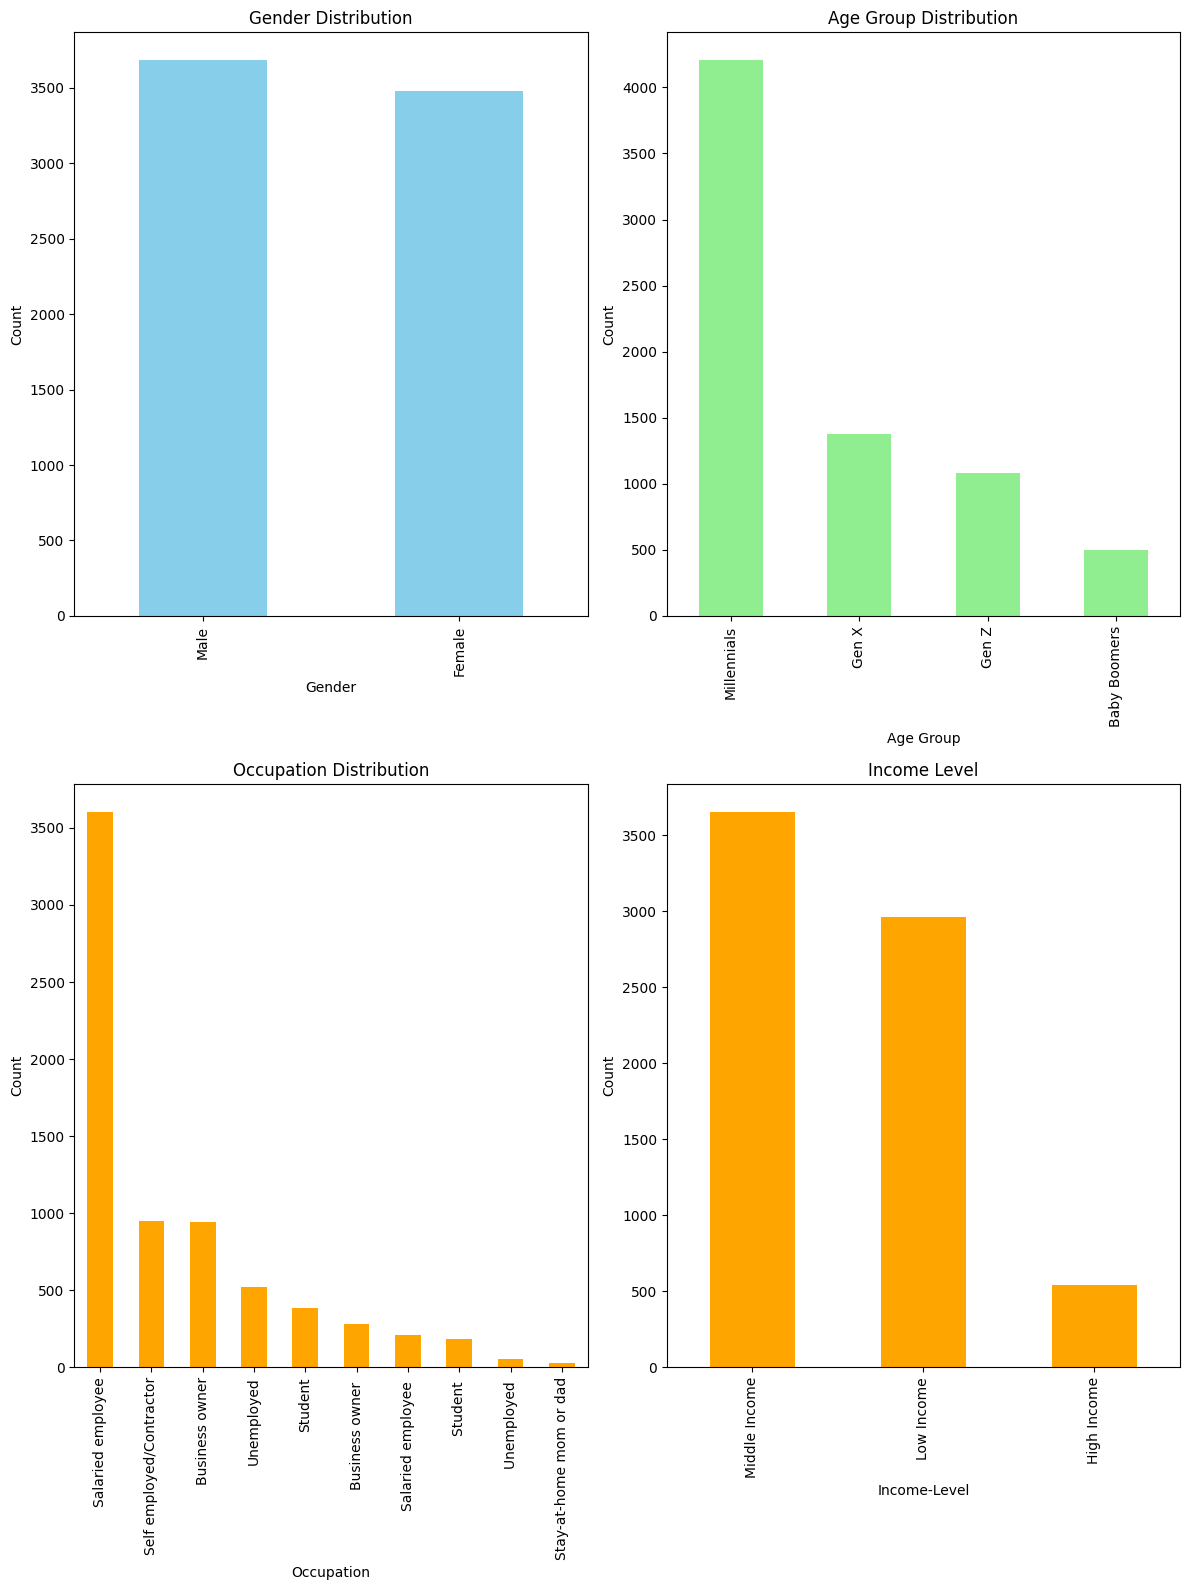

In [49]:
# Summarizing the columns of interest for EDA: Gender, Income Level, and Occupation
eda_summary = data[['Gender', 'Age-group', 'Occupation', "Income-Level"]].describe()

# Visualizing distributions for Gender, Age Group, Income-Level and Occupation
plt.figure(figsize=(12, 16))

# Gender Distribution
plt.subplot(2, 2, 1)
data['Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Income Level Distribution
plt.subplot(2, 2, 2)
data['Age-group'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Occupation Distribution
plt.subplot(2, 2, 3)
data['Occupation'].value_counts().plot(kind='bar', color='orange')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')

# Occupation Distribution
plt.subplot(2, 2, 4)
data['Income-Level'].value_counts().plot(kind='bar', color='orange')
plt.title('Income Level')
plt.xlabel('Income-Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [50]:
data.head(2)

,Period,Location,Gender,Marital-status,Age-group,Occupation,Income-Level,"Personal-Hygiene (eg Soap, toothpaste)",Cleaning-products,"Fresh-groceries (Fruits, vegetables)",Medicines-Natural-remedies,Alcohol-beverages,Skin-care (eg. Body lotion),Hair-care (eg. Shampoo),"Entertainment (eg. Restaurants, movies)","Beauty (eg Makeup, cosmetics, haircuts)",Clothing,Airtime-Data-bundles
0,20/03/2024,N36,Male,Married,Millennials,Business owner,Middle Income,More,More,More,Same,More,More,More,More,More,More,Same
1,20/03/2024,N4,Female,Married,Millennials,Salaried employee,Middle Income,Same,Same,Same,Same,Same,Same,Same,Same,Same,Same,Same


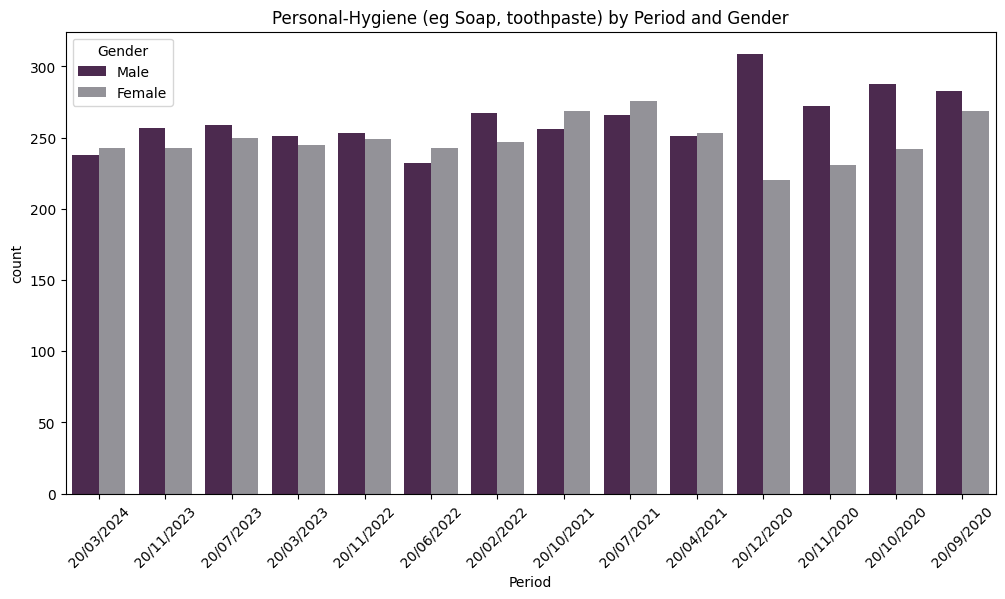

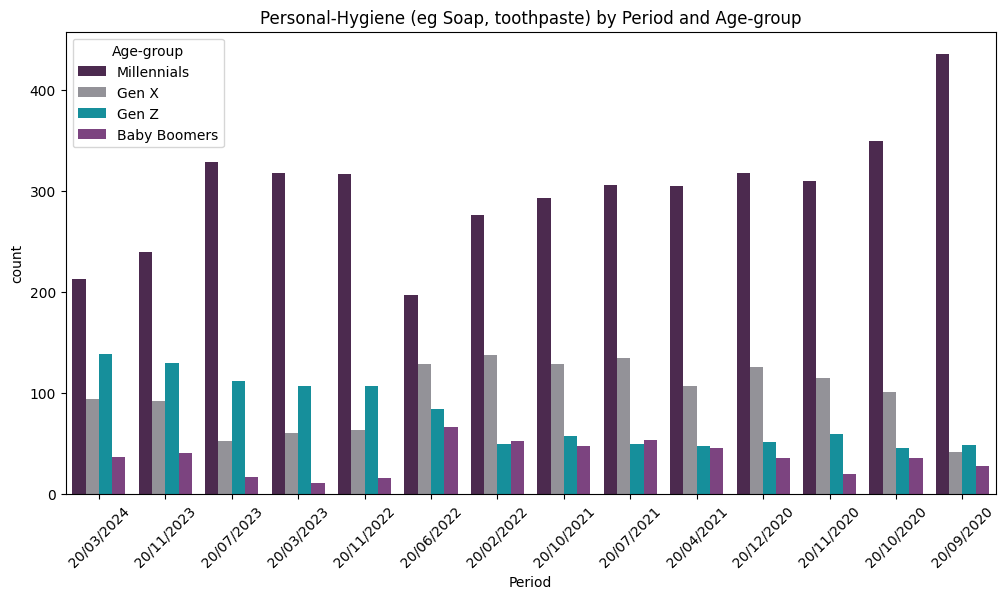

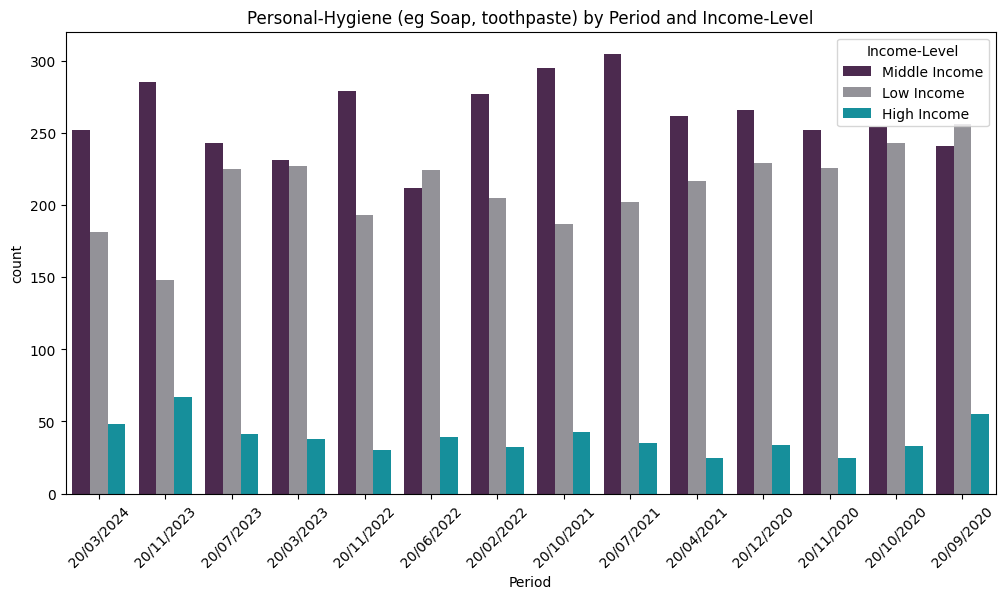

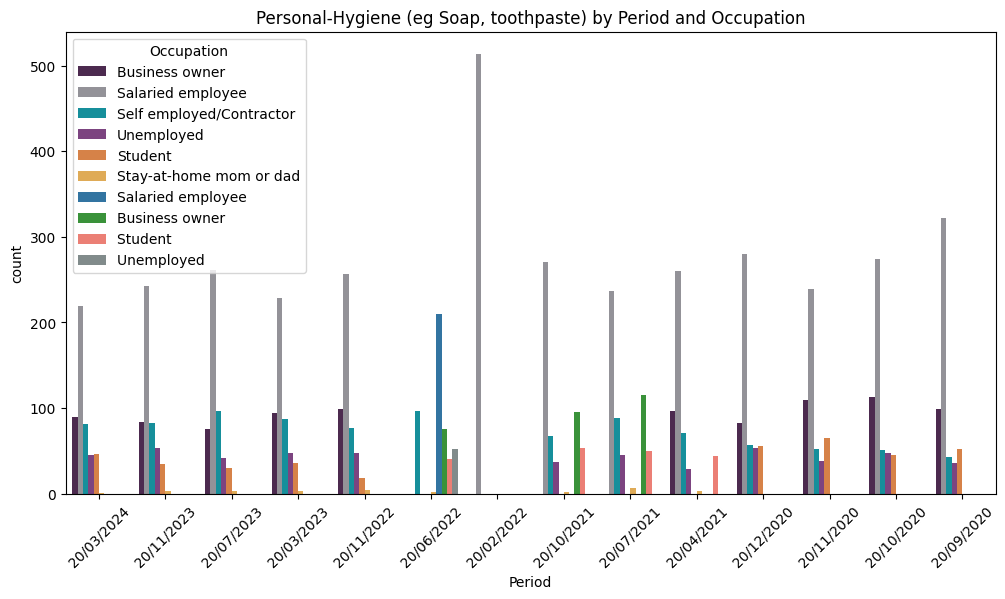

In [51]:
# Define the color palettes
palette_small = ["#512455", "#939199", "#00A1B1", "#843A8A", "#ED7D31"]
palette_large = ["#512455", "#939199", "#00A1B1", "#843A8A", "#ED7D31",
                 "#F5B041", "#1F77B4", "#2CA02C", "#FF6F61", "#7F8C8D",
                 "#D43F44", "#F4B942", "#6A3F2B"]

# Define the function to create bar plots with conditional color palettes
def create_bar_plots(df, x_var, y_var, hue_var):
    plt.figure(figsize=(12, 6))

    # Count the number of unique categories in the hue variable
    num_hues = data[hue_var].nunique()

    # Choose the palette based on the number of hues
    if num_hues <= 5:
        palette = palette_small
    else:
        palette = palette_large

    sns.countplot(data=data, x=x_var, hue=hue_var, palette=palette)
    plt.title(f'{y_var} by {x_var} and {hue_var}')
    plt.xticks(rotation=45)
    plt.show()

# Plot for 'Personal-Hygiene (eg Soap, toothpaste)' over 'Year' according to different demographic variables
demographic_vars = ['Gender', 'Age-group', 'Income-Level', 'Occupation']

# Loop through the demographic variables and plot the data
for dem_var in demographic_vars:
    create_bar_plots(data, 'Period', 'Personal-Hygiene (eg Soap, toothpaste)', dem_var)


Extract year and month from the Period column.

In [52]:
# Extract Year and Month from Period
data['Year'] = pd.to_datetime(data['Period']).dt.year
data['Month'] = pd.to_datetime(data['Period']).dt.month

# Reorganize columns to place 'Year' and 'Month' immediately after 'Period'
columns_order = ['Period', 'Year', 'Month'] + [col for col in data.columns if col not in ['Period', 'Year', 'Month']]
data = data[columns_order]

### 3. Correlation Heatmap:
Encoded features (Gender, Income Level, Occupation) have minimal direct correlation, which is expected as they are categorical.

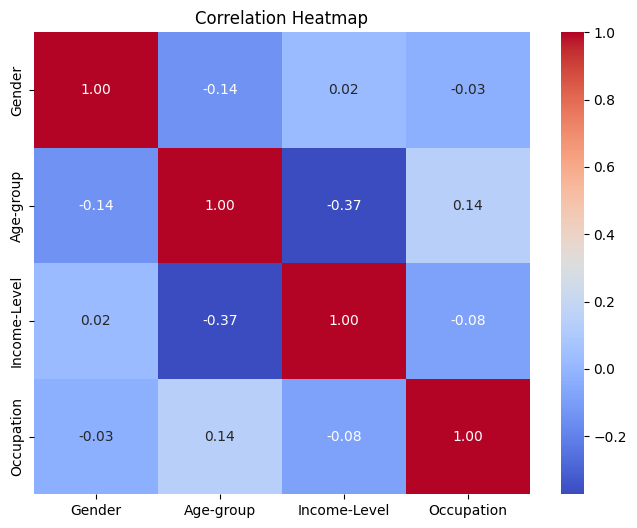

In [53]:
# Correlation Analysis (encoded numerically for Gender, Income-Level, Occupation)
encoded_data = data[['Gender', 'Age-group', 'Income-Level', 'Occupation']].copy()

# Mapping for encoding
gender_map = {'Male': 1, 'Female': 0}
age_group_map = {'Millenials': 3, 'Gen Z': 2, 'Gen X': 1, 'Baby Boomers': 0}
income_map = {'High Income': 2, 'Middle Income': 1, 'Low Income': 0}
occupation_map = {v: i for i, v in enumerate(data['Occupation'].unique())}

encoded_data['Gender'] = encoded_data['Gender'].map(gender_map)
encoded_data['Age-group'] = encoded_data['Age-group'].map(age_group_map)
encoded_data['Income-Level'] = encoded_data['Income-Level'].map(income_map)
encoded_data['Occupation'] = encoded_data['Occupation'].map(occupation_map)

# Compute correlation
correlation_matrix = encoded_data.corr()

# Plotting correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Statistical Analysis

In [54]:
# # Modify the data in order to achieve better model performance and accuracy.
# # Statistical analysis of spending trends
# def analyze_spending(df):
#     spending_columns = [
#         " Personal-Hygiene (eg Soap, toothpaste)", "Cleaning-products ",
#         "Fresh-groceries (Fruits, vegetables)", "Medicines-Natural-remedies",
#         "Alcohol-beverages", "Skin-care (eg. Body lotion)",
#         "Hair-care (eg. Shampoo)", "Entertainment (eg. Restaurants, movies)",
#         "Beauty (eg Makeup, cosmetics, haircuts)", "Clothing",
#         "Airtime-Data-bundles"
#     ]

#     # Convert spending trends to numerical values for analysis
#     trend_mapping = {"More": 1, "Same": 0, "Less": -1}
#     df_numeric = df.copy()
#     df_numeric[spending_columns] = df[spending_columns].replace(trend_mapping)

#     # Calculate the average trend
#     avg_trend = df_numeric[spending_columns].mean()
#     print("\nAverage Spending Trend:\n", avg_trend)

#     # Visualize spending trends
#     plt.figure(figsize=(12, 6))
#     sns.barplot(x=avg_trend.index, y=avg_trend.values, palette="viridis")
#     plt.title("Average Spending Trends Across Categories", fontsize=16)
#     plt.ylabel("Average Trend (1: More, 0: Same, -1: Less)", fontsize=12)
#     plt.xticks(rotation=45, fontsize=10)
#     plt.tight_layout()
#     plt.show()

# # Perform the analysis
# analyze_spending(data)

## Model Development

In [55]:
encoded_data.head()

,Gender,Age-group,Income-Level,Occupation
0,1,NaN,1,0
1,0,NaN,1,1
2,1,NaN,0,2
3,0,1.0,2,2
4,0,1.0,2,3


In [56]:
encoded_data['Age-group'] = encoded_data['Age-group'].fillna(encoded_data['Age-group'].mean())
encoded_data['Age-group'] = encoded_data['Age-group'].astype(int)
encoded_data.head()

,Gender,Age-group,Income-Level,Occupation
0,1,1,1,0
1,0,1,1,1
2,1,1,0,2
3,0,1,2,2
4,0,1,2,3


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

### Split Data into Train and Test

In [58]:
# 1. Preprocess the data
# Define the target variables (multi-label targets)
y = encoded_data[['Gender', 'Age-group', 'Occupation', "Income-Level"]]

# Define feature variables (exclude target columns and irrelevant ones)
X = data.drop(columns=['Gender', 'Age-group', 'Occupation', 'Income-Level', 'Year', 'Month'])

# Encode categorical variables in features
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [59]:
data.to_csv("data.csv")

In [60]:
encoded_data.to_csv("encoded.csv")

* Targets (y) are:
>>
Gender, Age-group, Income-Level, and Occupation.

* Features (X) exclude targets and irrelevant columns.

In [61]:
# 2. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape, y.shape)

(7162, 14) (7162, 4)


In [62]:
y[:5]

,Gender,Age-group,Occupation,Income-Level
0,1,1,0,1
1,0,1,1,1
2,1,1,2,0
3,0,1,2,2
4,0,1,3,2


In [63]:
X_train.to_csv("X_train.csv")

In [64]:
y_train.to_csv("y_train.csv")

In [65]:
X_test.to_csv("X_test.csv")

In [66]:
y_test.to_csv("y_test.csv")

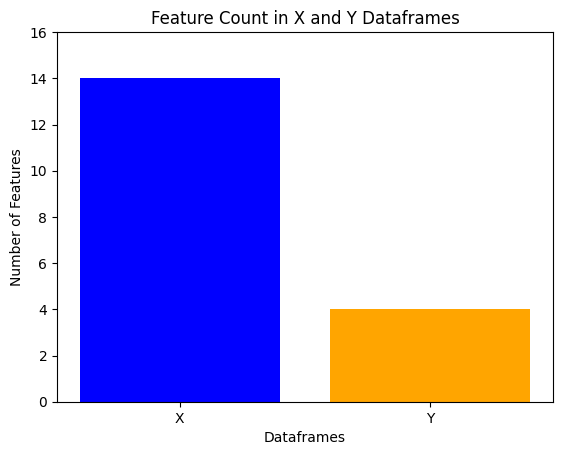

In [67]:
# Simulate the shapes as given
x_shape = X.shape
y_shape = y.shape

# Create the bar chart
labels = ['X', 'Y']
features = [x_shape[1], y_shape[1]]

plt.bar(labels, features, color=['blue', 'orange'])
plt.xlabel('Dataframes')
plt.ylabel('Number of Features')
plt.title('Feature Count in X and Y Dataframes')
plt.ylim(0, max(features) + 2)

# Display the bar chart
plt.show()

### Model Training:

The MultiOutputClassifier wraps a Random Forest classifier to predict multiple outputs.

#### Random Forest

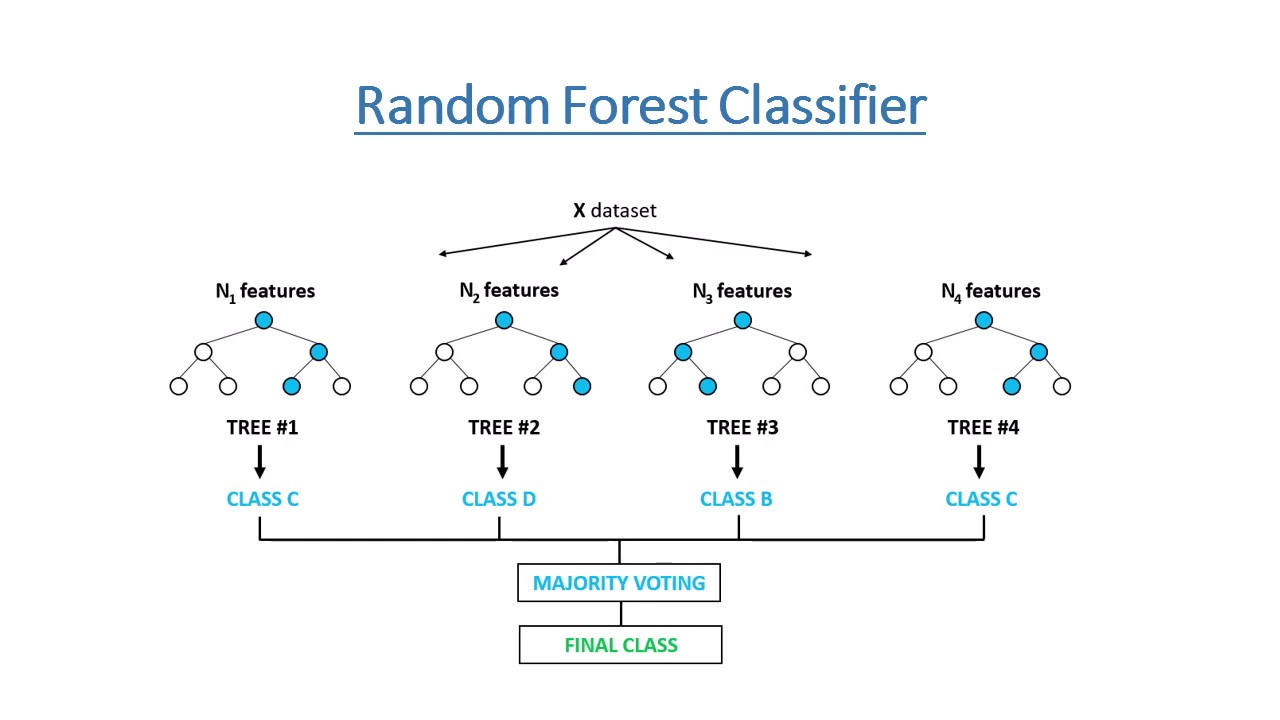

In [68]:
# 3. Initialize and train the model
rfc_base_classifier = RandomForestClassifier(random_state=42)
multi_classifier_rfc = MultiOutputClassifier(rfc_base_classifier)
multi_classifier_rfc.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [69]:
# 4. Make predictions
y_pred_rfc = multi_classifier_rfc.predict(X_test)
y_pred_rfc[:5]

array([[1, 1, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 0, 1],
       [0, 1, 7, 1],
       [1, 1, 0, 0]])

In [70]:
data.iloc[:3, 8:]

,Income-Level,"Personal-Hygiene (eg Soap, toothpaste)",Cleaning-products,"Fresh-groceries (Fruits, vegetables)",Medicines-Natural-remedies,Alcohol-beverages,Skin-care (eg. Body lotion),Hair-care (eg. Shampoo),"Entertainment (eg. Restaurants, movies)","Beauty (eg Makeup, cosmetics, haircuts)",Clothing,Airtime-Data-bundles
0,Middle Income,More,More,More,Same,More,More,More,More,More,More,Same
1,Middle Income,Same,Same,Same,Same,Same,Same,Same,Same,Same,Same,Same
2,Low Income,Same,Same,Same,Less,Not sure,Not sure,Not sure,Less,Same,Less,Same


#### KNearestNeighbors
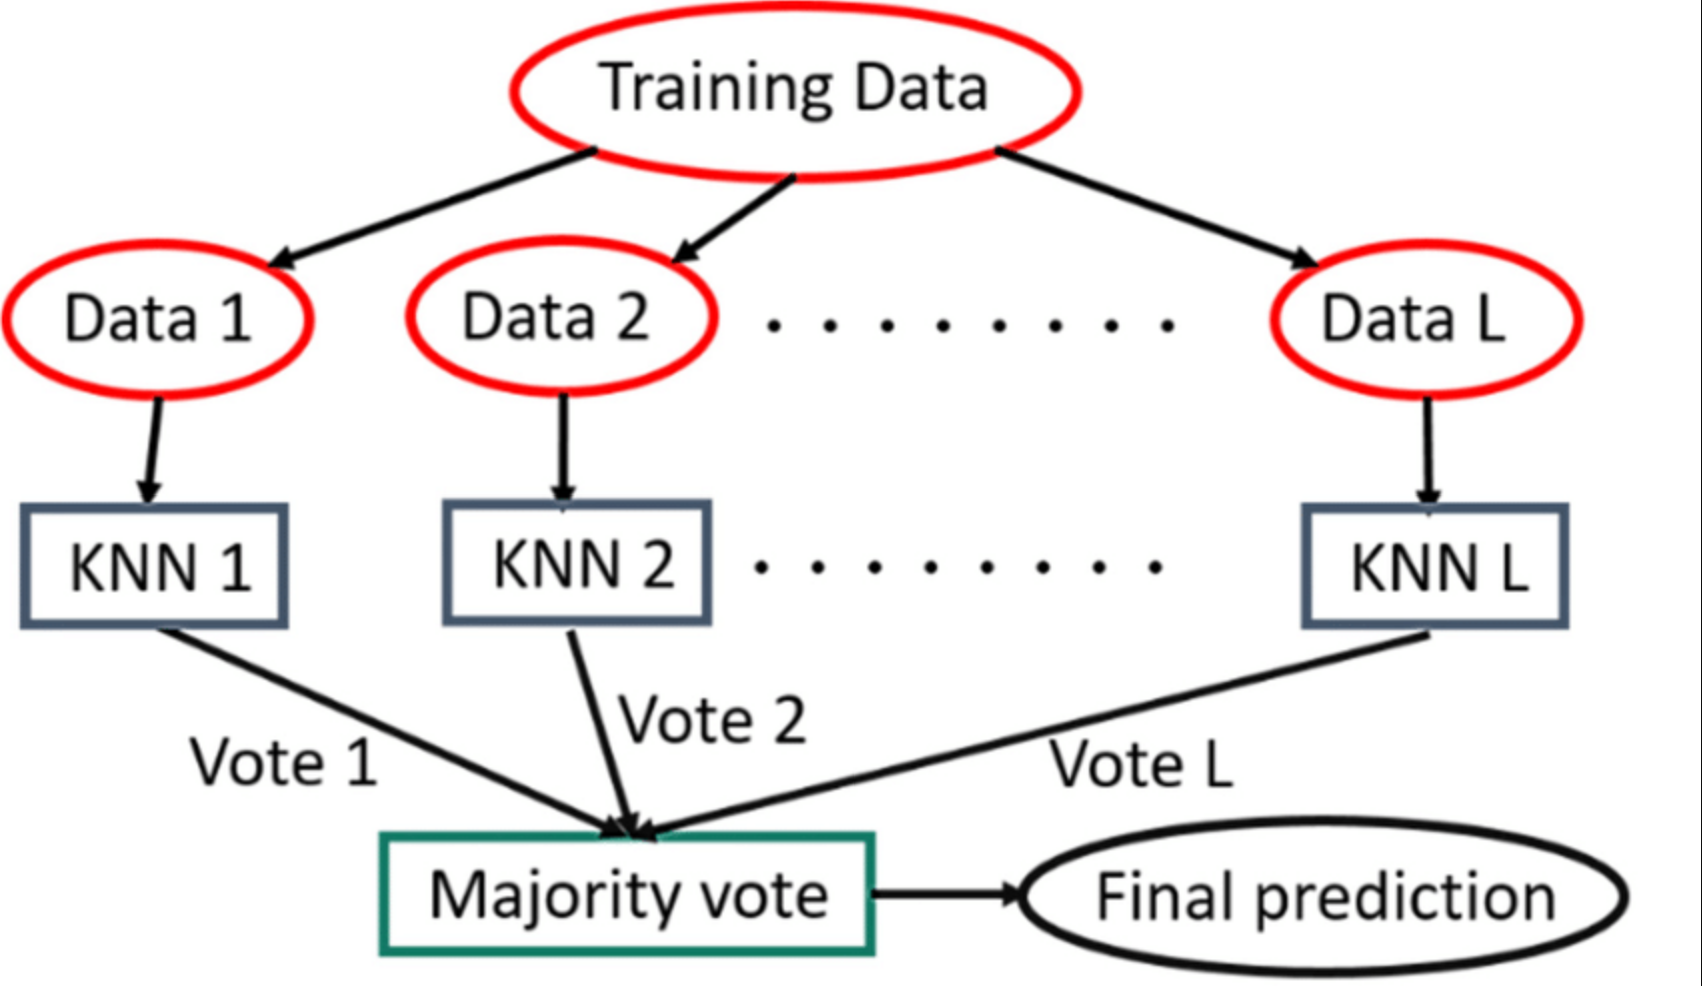

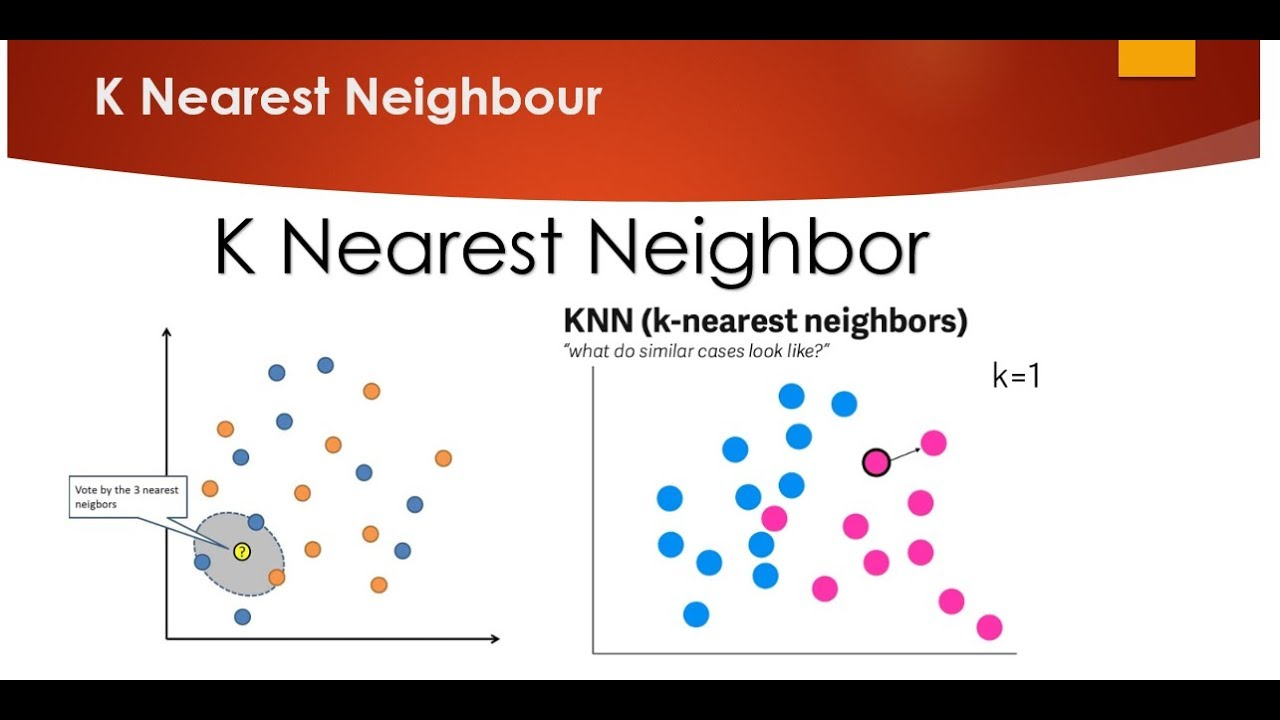

In [71]:
# 3. Initialize and train the model
knn_base_classifier = KNeighborsClassifier(n_neighbors=3)
multi_classifier_knn = MultiOutputClassifier(knn_base_classifier)
multi_classifier_knn.fit(X_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=3))

In [72]:
# 4. Make predictions
y_pred_knn = multi_classifier_knn.predict(X_test)
y_pred_knn[:5]

array([[1, 1, 1, 0],
       [0, 1, 3, 0],
       [1, 1, 0, 1],
       [0, 1, 1, 0],
       [1, 1, 1, 0]])

#### XGBoost
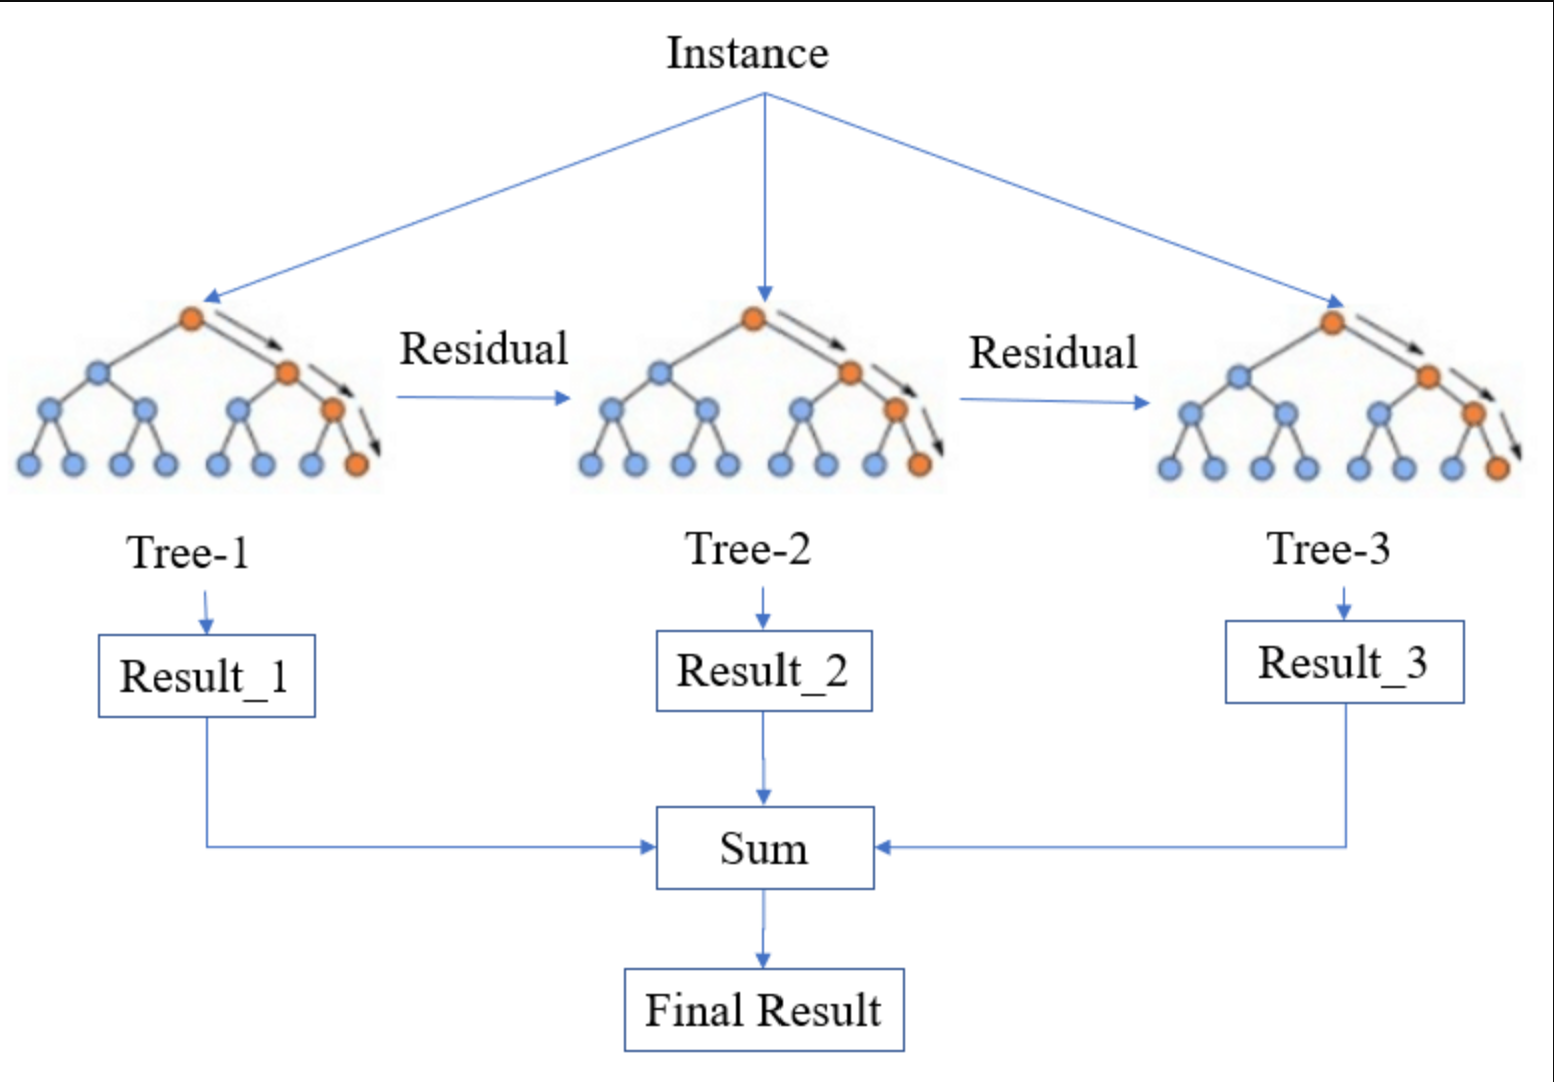

In [73]:
# 3. Initialize and train the model

# Step 2: Train an XGBoost model
xgb_base_classifier = xgb.XGBClassifier(  # Use XGBRegressor for regression problems
    n_estimators=18,           # Number of trees
    learning_rate=0.0001,          # Step size shrinkage
    max_depth=15,                # Maximum depth of a tree
    random_state=42             # Random seed
)
multi_classifier_xgb = MultiOutputClassifier(xgb_base_classifier)
multi_classifier_xgb.fit(X_train, y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.0001,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=15,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=18, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))

In [74]:
# 4. Make predictions
y_pred_xgb = multi_classifier_xgb.predict(X_test)
y_pred_xgb[:5]

array([[1, 1, 1, 1],
       [1, 1, 2, 1],
       [1, 1, 0, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

## Evaluation:

A classification report is printed for each target.

### Model Evaluation

#### Random Forest

In [75]:
# 5. Generate and display classification reports for each target
for i, target in enumerate(y.columns):
    print(f"Classification Report for {target}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred_rfc[:, i]))
    print("\n" + "="*50 + "\n")

Classification Report for Gender:

              precision    recall  f1-score   support

           0       0.60      0.58      0.59       712
           1       0.60      0.62      0.61       721

    accuracy                           0.60      1433
   macro avg       0.60      0.60      0.60      1433
weighted avg       0.60      0.60      0.60      1433



Classification Report for Age-group:

              precision    recall  f1-score   support

           0       0.78      0.20      0.31        92
           1       0.82      0.96      0.88      1128
           2       0.51      0.23      0.31       213

    accuracy                           0.80      1433
   macro avg       0.70      0.46      0.50      1433
weighted avg       0.77      0.80      0.76      1433



Classification Report for Occupation:

              precision    recall  f1-score   support

           0       0.30      0.18      0.22       156
           1       0.58      0.88      0.70       733
           2 

Feature importance for output 1:
Feature: Location, Importance: 0.19595201253021843
Feature: Period, Importance: 0.16670051341035033
Feature: Marital-status, Importance: 0.0942215440492576
Feature: Medicines-Natural-remedies, Importance: 0.05888194831067576
Feature: Alcohol-beverages, Importance: 0.05650446204398156
Feature: Hair-care (eg. Shampoo), Importance: 0.055971412732098984
Feature: Airtime-Data-bundles, Importance: 0.05158285738173031
Feature: Entertainment (eg. Restaurants, movies), Importance: 0.047648215080548305
Feature: Clothing, Importance: 0.04707721807797334
Feature: Fresh-groceries (Fruits, vegetables), Importance: 0.047038239690697134
Feature:  Personal-Hygiene (eg Soap, toothpaste), Importance: 0.04596503635450979
Feature: Cleaning-products , Importance: 0.04554118627884897
Feature: Beauty (eg Makeup, cosmetics, haircuts), Importance: 0.04539099480442508
Feature: Skin-care (eg. Body lotion), Importance: 0.04152435925468443


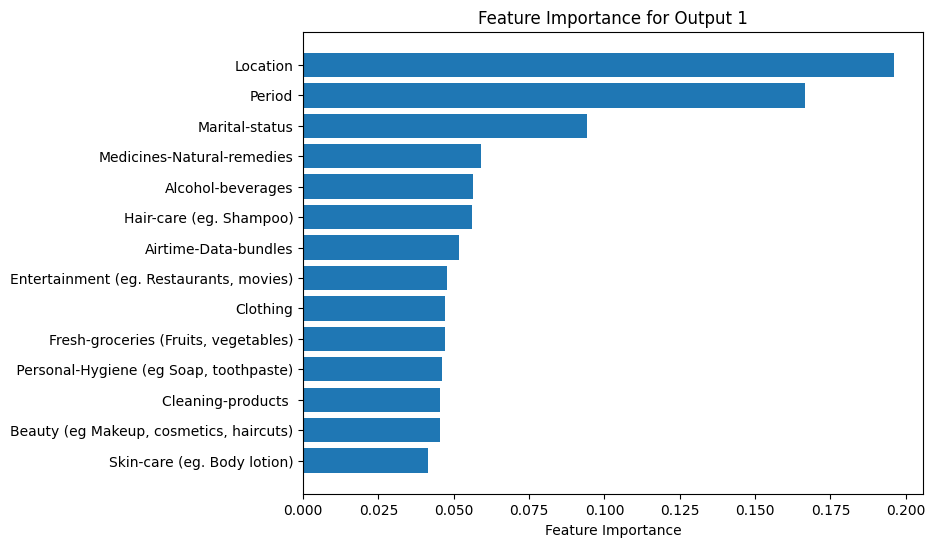

Feature importance for output 2:
Feature: Location, Importance: 0.21028937475650392
Feature: Period, Importance: 0.14218750039110326
Feature: Marital-status, Importance: 0.13777991099888018
Feature: Alcohol-beverages, Importance: 0.05923076571298798
Feature: Medicines-Natural-remedies, Importance: 0.05548578445617954
Feature: Entertainment (eg. Restaurants, movies), Importance: 0.05095270166472401
Feature: Airtime-Data-bundles, Importance: 0.04660494134281067
Feature: Hair-care (eg. Shampoo), Importance: 0.045274875267087705
Feature: Beauty (eg Makeup, cosmetics, haircuts), Importance: 0.04520709333416903
Feature: Clothing, Importance: 0.043859519586398714
Feature: Skin-care (eg. Body lotion), Importance: 0.043600162352819896
Feature: Fresh-groceries (Fruits, vegetables), Importance: 0.04234602858370819
Feature:  Personal-Hygiene (eg Soap, toothpaste), Importance: 0.03998595055579909
Feature: Cleaning-products , Importance: 0.037195390996827726


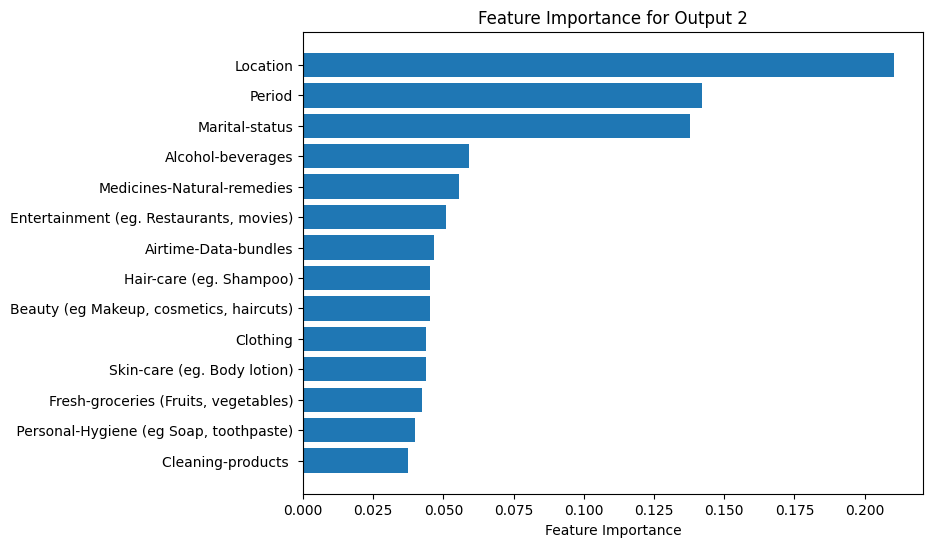

Feature importance for output 3:
Feature: Period, Importance: 0.20054111037393205
Feature: Location, Importance: 0.176072406708901
Feature: Marital-status, Importance: 0.08212976898751903
Feature: Alcohol-beverages, Importance: 0.06256632336549094
Feature: Medicines-Natural-remedies, Importance: 0.06024317119368258
Feature: Entertainment (eg. Restaurants, movies), Importance: 0.04982624075011415
Feature: Hair-care (eg. Shampoo), Importance: 0.04900749185718269
Feature: Skin-care (eg. Body lotion), Importance: 0.04737527925344447
Feature: Beauty (eg Makeup, cosmetics, haircuts), Importance: 0.047345296211836196
Feature: Clothing, Importance: 0.047183529450198304
Feature: Fresh-groceries (Fruits, vegetables), Importance: 0.046437284389936793
Feature: Airtime-Data-bundles, Importance: 0.045234538995908305
Feature: Cleaning-products , Importance: 0.043463824036552134
Feature:  Personal-Hygiene (eg Soap, toothpaste), Importance: 0.04257373442530138


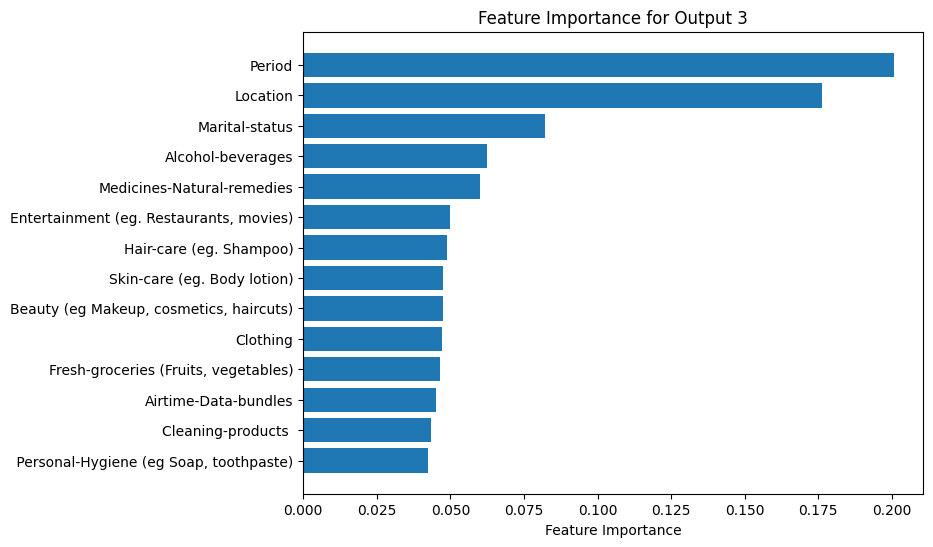

Feature importance for output 4:
Feature: Location, Importance: 0.22071134314147567
Feature: Period, Importance: 0.15770206143881993
Feature: Marital-status, Importance: 0.0980770978348559
Feature: Alcohol-beverages, Importance: 0.0625606523153337
Feature: Medicines-Natural-remedies, Importance: 0.057572831283686336
Feature: Entertainment (eg. Restaurants, movies), Importance: 0.05444751876688694
Feature: Hair-care (eg. Shampoo), Importance: 0.04906719800557228
Feature: Beauty (eg Makeup, cosmetics, haircuts), Importance: 0.04564896311630475
Feature: Fresh-groceries (Fruits, vegetables), Importance: 0.04443449629996692
Feature: Clothing, Importance: 0.0432830288728366
Feature: Skin-care (eg. Body lotion), Importance: 0.04218247133806329
Feature:  Personal-Hygiene (eg Soap, toothpaste), Importance: 0.042087047315815286
Feature: Airtime-Data-bundles, Importance: 0.04184048218822548
Feature: Cleaning-products , Importance: 0.04038480808215699


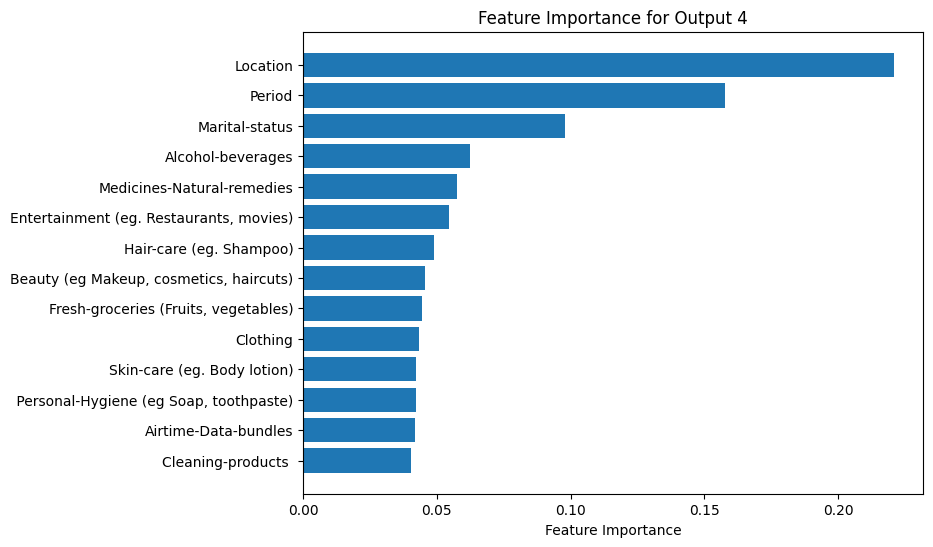

In [76]:
# Loop through each classifier in the multi-output classifier
for i, estimator in enumerate(multi_classifier_rfc.estimators_):
    print(f"Feature importance for output {i + 1}:")

    # Get feature importances
    feature_importances = estimator.feature_importances_

    # Sort feature importance in descending order
    sorted_idx = np.argsort(feature_importances)[::-1]

    # Print sorted feature importances
    for idx in sorted_idx:
        print(f"Feature: {X_train.columns[idx]}, Importance: {feature_importances[idx]}")

    # Plot feature importances
    plt.figure(figsize=(8, 6))
    plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importance for Output {i + 1}")
    plt.gca().invert_yaxis()
    plt.show()

#### KNN Classifier

In [77]:
# 5. Generate and display classification reports for each target
for i, target in enumerate(y.columns):
    print(f"Classification Report for {target}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred_knn[:, i]))
    print("\n" + "="*50 + "\n")

Classification Report for Gender:

              precision    recall  f1-score   support

           0       0.54      0.51      0.52       712
           1       0.54      0.56      0.55       721

    accuracy                           0.54      1433
   macro avg       0.54      0.54      0.54      1433
weighted avg       0.54      0.54      0.54      1433



Classification Report for Age-group:

              precision    recall  f1-score   support

           0       0.18      0.21      0.19        92
           1       0.81      0.87      0.84      1128
           2       0.37      0.21      0.27       213

    accuracy                           0.73      1433
   macro avg       0.46      0.43      0.43      1433
weighted avg       0.71      0.73      0.72      1433



Classification Report for Occupation:

              precision    recall  f1-score   support

           0       0.16      0.32      0.21       156
           1       0.56      0.65      0.60       733
           2 

#### XGBoost

In [78]:
# 5. Generate and display classification reports for each target
for i, target in enumerate(y.columns):
    print(f"Classification Report for {target}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred_xgb[:, i]))
    print("\n" + "="*50 + "\n")

Classification Report for Gender:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       712
           1       0.50      1.00      0.67       721

    accuracy                           0.50      1433
   macro avg       0.25      0.50      0.33      1433
weighted avg       0.25      0.50      0.34      1433



Classification Report for Age-group:

              precision    recall  f1-score   support

           0       0.65      0.30      0.41        92
           1       0.84      0.93      0.88      1128
           2       0.49      0.32      0.39       213

    accuracy                           0.80      1433
   macro avg       0.66      0.52      0.56      1433
weighted avg       0.77      0.80      0.78      1433



Classification Report for Occupation:

              precision    recall  f1-score   support

           0       0.19      0.12      0.15       156
           1       0.59      0.80      0.68       733
           2 

Feature importance for output 1:
Feature: Hair-care (eg. Shampoo), Importance: 0.6857897639274597
Feature: Alcohol-beverages, Importance: 0.05894191563129425
Feature: Skin-care (eg. Body lotion), Importance: 0.03668616712093353
Feature: Airtime-Data-bundles, Importance: 0.025077268481254578
Feature: Location, Importance: 0.024433229118585587
Feature: Cleaning-products , Importance: 0.02186129055917263
Feature: Entertainment (eg. Restaurants, movies), Importance: 0.021295400336384773
Feature: Marital-status, Importance: 0.020960574969649315
Feature:  Personal-Hygiene (eg Soap, toothpaste), Importance: 0.020266398787498474
Feature: Clothing, Importance: 0.01841258816421032
Feature: Medicines-Natural-remedies, Importance: 0.017885448411107063
Feature: Fresh-groceries (Fruits, vegetables), Importance: 0.017289333045482635
Feature: Beauty (eg Makeup, cosmetics, haircuts), Importance: 0.016675982624292374
Feature: Period, Importance: 0.014424731023609638


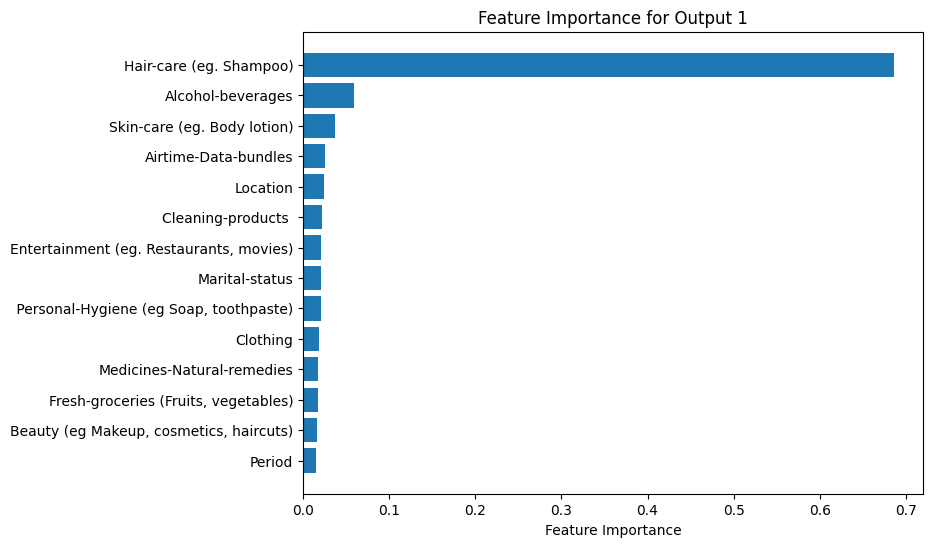

Feature importance for output 2:
Feature: Marital-status, Importance: 0.5108070969581604
Feature: Location, Importance: 0.08749870210886002
Feature: Period, Importance: 0.04559352993965149
Feature: Clothing, Importance: 0.04191171005368233
Feature: Hair-care (eg. Shampoo), Importance: 0.03617960214614868
Feature: Airtime-Data-bundles, Importance: 0.0348067544400692
Feature: Alcohol-beverages, Importance: 0.03415444493293762
Feature: Skin-care (eg. Body lotion), Importance: 0.033575937151908875
Feature: Medicines-Natural-remedies, Importance: 0.03067498654127121
Feature: Entertainment (eg. Restaurants, movies), Importance: 0.03033546358346939
Feature:  Personal-Hygiene (eg Soap, toothpaste), Importance: 0.03027953952550888
Feature: Cleaning-products , Importance: 0.030101653188467026
Feature: Beauty (eg Makeup, cosmetics, haircuts), Importance: 0.02768046036362648
Feature: Fresh-groceries (Fruits, vegetables), Importance: 0.02640020102262497


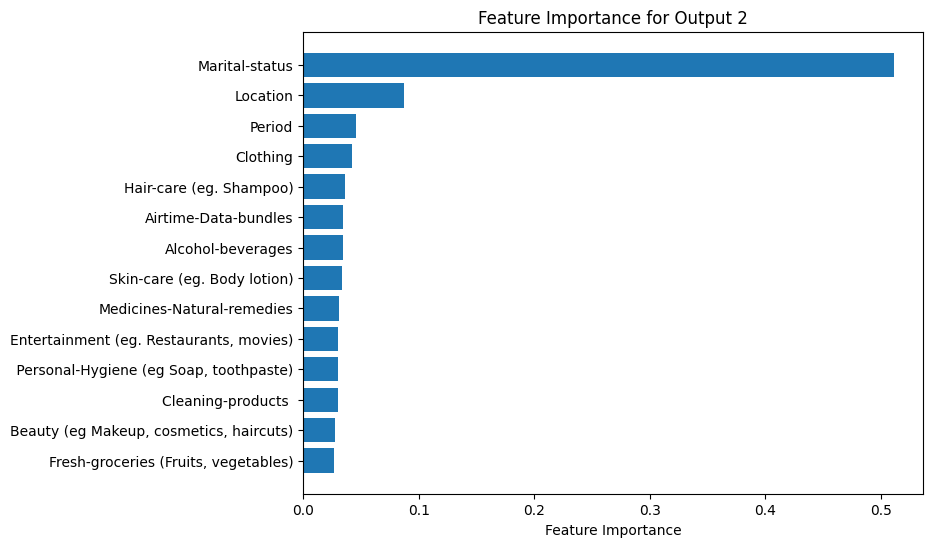

Feature importance for output 3:
Feature: Period, Importance: 0.2606109380722046
Feature: Marital-status, Importance: 0.12191237509250641
Feature: Location, Importance: 0.093297079205513
Feature:  Personal-Hygiene (eg Soap, toothpaste), Importance: 0.06169804930686951
Feature: Airtime-Data-bundles, Importance: 0.05851795896887779
Feature: Entertainment (eg. Restaurants, movies), Importance: 0.05013482645153999
Feature: Cleaning-products , Importance: 0.04819120466709137
Feature: Skin-care (eg. Body lotion), Importance: 0.04746868461370468
Feature: Fresh-groceries (Fruits, vegetables), Importance: 0.04726407676935196
Feature: Clothing, Importance: 0.04482197016477585
Feature: Alcohol-beverages, Importance: 0.044202715158462524
Feature: Hair-care (eg. Shampoo), Importance: 0.04278051480650902
Feature: Medicines-Natural-remedies, Importance: 0.041936714202165604
Feature: Beauty (eg Makeup, cosmetics, haircuts), Importance: 0.037162888795137405


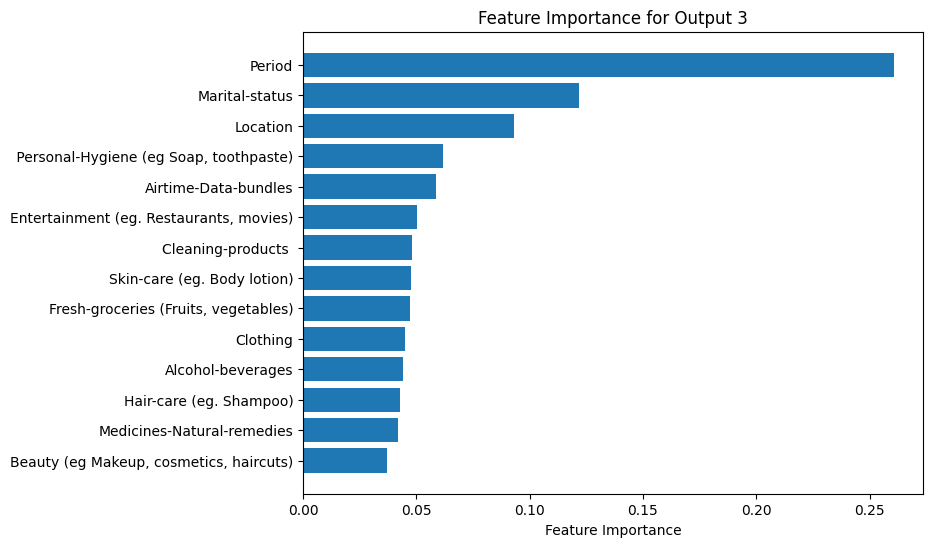

Feature importance for output 4:
Feature: Location, Importance: 0.16255079209804535
Feature: Marital-status, Importance: 0.15444226562976837
Feature: Period, Importance: 0.06751184910535812
Feature: Beauty (eg Makeup, cosmetics, haircuts), Importance: 0.0643681213259697
Feature: Alcohol-beverages, Importance: 0.06265139579772949
Feature:  Personal-Hygiene (eg Soap, toothpaste), Importance: 0.05926407128572464
Feature: Fresh-groceries (Fruits, vegetables), Importance: 0.05906059220433235
Feature: Airtime-Data-bundles, Importance: 0.05797605961561203
Feature: Hair-care (eg. Shampoo), Importance: 0.057500507682561874
Feature: Entertainment (eg. Restaurants, movies), Importance: 0.05526737868785858
Feature: Cleaning-products , Importance: 0.05416705831885338
Feature: Clothing, Importance: 0.053460247814655304
Feature: Medicines-Natural-remedies, Importance: 0.04735824093222618
Feature: Skin-care (eg. Body lotion), Importance: 0.0444214753806591


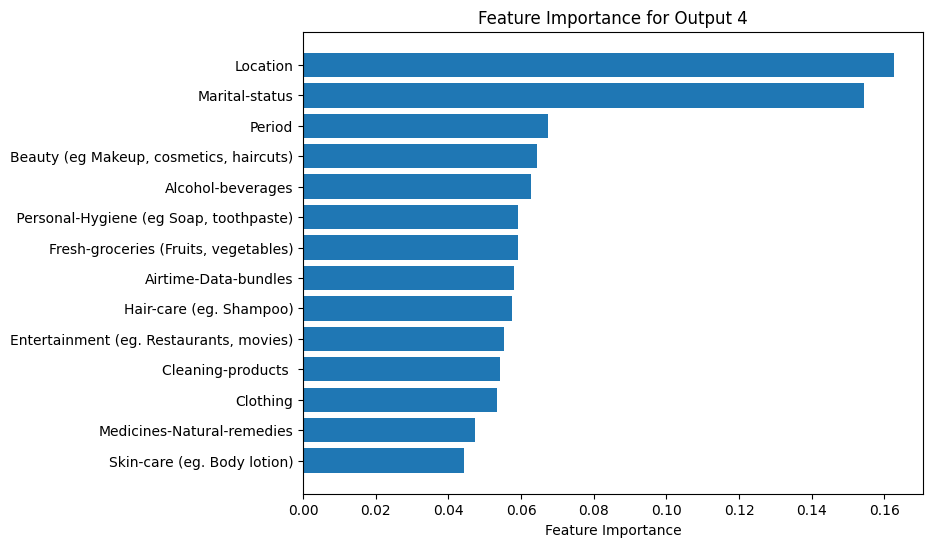

In [79]:
# Plot feature importance
# Loop through each classifier in the multi-output classifier
for i, estimator in enumerate(multi_classifier_xgb.estimators_):
    print(f"Feature importance for output {i + 1}:")

    # Get feature importances
    feature_importances = estimator.feature_importances_

    # Sort feature importance in descending order
    sorted_idx = np.argsort(feature_importances)[::-1]

    # Print sorted feature importances
    for idx in sorted_idx:
        print(f"Feature: {X_train.columns[idx]}, Importance: {feature_importances[idx]}")

    # Plot feature importances
    plt.figure(figsize=(8, 6))
    plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importance for Output {i + 1}")
    plt.gca().invert_yaxis()
    plt.show()

### Model Interpretability (LIME & SHAP)

In [80]:
!pip install lime shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=96f5689008881c86af725e66bfe3211751656333082b2362f704f890b029ef57
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


#### Lime
[https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=157156376071&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=720362650444&utm_targetid=dsa-2218886984380&utm_loc_interest_ms=&utm_loc_physical_ms=9076824&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p2_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-bfcm24&gad_sourc](https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=157156376071&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=720362650444&utm_targetid=dsa-2218886984380&utm_loc_interest_ms=&utm_loc_physical_ms=9076824&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p2_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-bfcm24&gad_sourc)


In [81]:
# # Define a custom prediction function for LIME
# def custom_predict_proba(X):
#     # Get predictions from the multi-output classifier
#     predictions = [est.predict_proba(X) for est in multi_classifier_xgb.estimators_]
#     # Combine predictions into a single 2D array (assuming binary classification for simplicity)
#     combined_predictions = np.hstack([pred[:, 1].reshape(-1, 1) for pred in predictions])
#     return combined_predictions

# # Generate explanation for the sample
# explanation = explainer.explain_instance(
#     sample,
#     custom_predict_proba,  # Use the custom prediction function
#     num_features=10  # Number of top features to display
# )

# # Visualize the explanation
# explanation.show_in_notebook(show_all=False)


#### SHAP

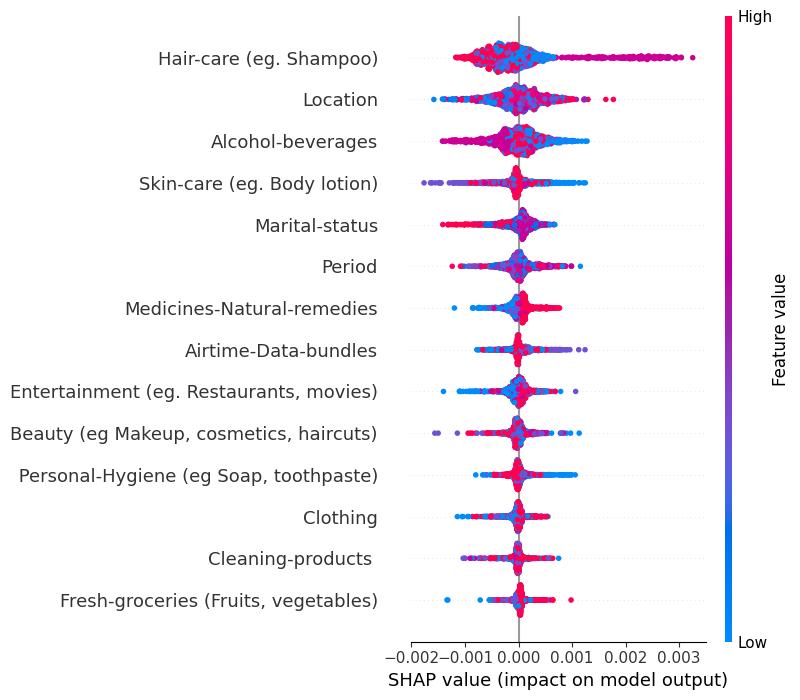

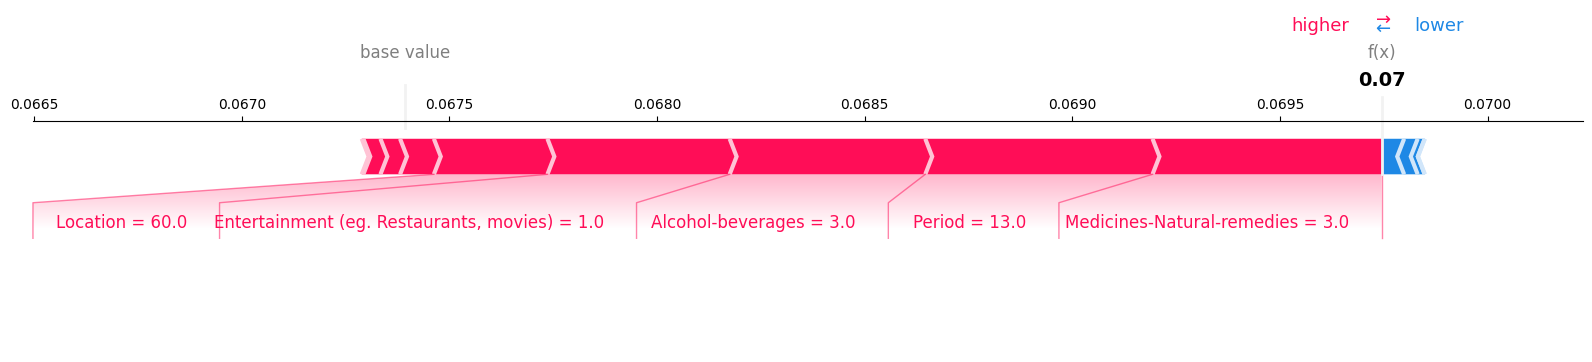

In [82]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(multi_classifier_xgb.estimators_[0])  # Use one estimator for simplicity

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Summary plot for global interpretability
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Force plot for local interpretability
sample_idx = 0  # Choose a sample
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx],
    X_test.iloc[sample_idx],
    matplotlib=True
)


In [83]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [84]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(multi_classifier_xgb, open(file_name, "wb"))

In [85]:
import joblib

def save_columns(feature_columns, target_columns):
    joblib.dump(feature_columns, 'feature_columns.pkl')
    joblib.dump(target_columns, 'target_columns.pkl')

save_columns(X.columns, y.columns)